In [19]:
import h5py
import matplotlib.pyplot as plt
import numpy as np 

from multicam.tng.utils import convert_tng_mass

## Extract data

In [2]:
# get gmass over all files 
subhalo_ids = []
subhalo_mass = []
stellar_mass = []

count = 0
for ii in range(0, 448):
    filename = f'../../data/tng/100/fof_subhalo_tab_099.{ii}.hdf5'
    with h5py.File(filename, 'r') as f:
        if 'SubhaloMass' in f['Subhalo'].keys():
            for s in f['Subhalo']['SubhaloMass']:
                subhalo_ids.append(count)
                subhalo_mass.append(s)
                count+=1

            for s in f['Subhalo']['SubhaloMassInRadType'][:,4]: # 4 = star particles
                stellar_mass.append(s)


subhalo_ids = np.array(subhalo_ids)
subhalo_mass = convert_tng_mass(np.array(subhalo_mass))
stellar_mass = convert_tng_mass(np.array(stellar_mass))

/Users/imendoza/code/nbody-relaxed/multicam/tng/utils.py:24: RuntimeWarning: divide by zero encountered in log10
  return np.where(gmass > 0, np.log10(gmass * 1e10 / TNG_H), 0)


In [3]:
subhalo_mass.shape

(4371211,)

## Colors

In [20]:
file = "../../data/tng/Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc_099.hdf5"

In [21]:
fc = h5py.File(file, 'r')

In [22]:
fc.keys()

<KeysViewHDF5 ['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc', 'subhaloIDs']>

In [23]:
sdss_g = fc['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc'][:, 1, 0]
sdss_r = fc['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc'][:, 2, 0]
gr = sdss_g - sdss_r
gr.shape

(4371211,)

In [8]:
np.sum(np.isnan(gr)) / len(gr)

0.9229625382988833

In [36]:
fc['subhaloIDs'][:].shape

(4371211,)

## L* sample

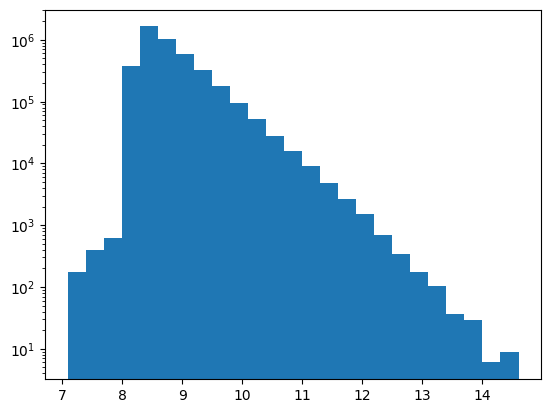

In [9]:
plt.hist(subhalo_mass, bins=25)
plt.yscale('log')

In [10]:
sum((subhalo_mass < 12.2) & (subhalo_mass > 11.8))

2209

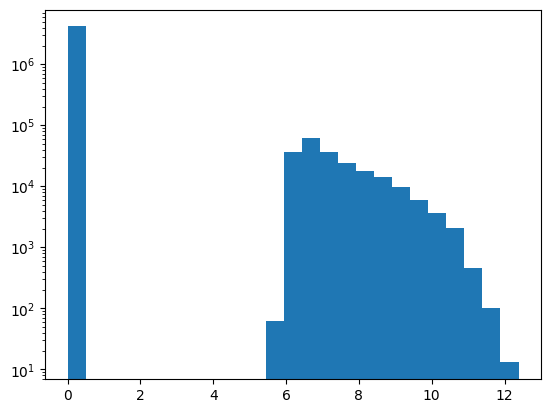

In [11]:
plt.hist(stellar_mass, bins=25)
plt.yscale('log')

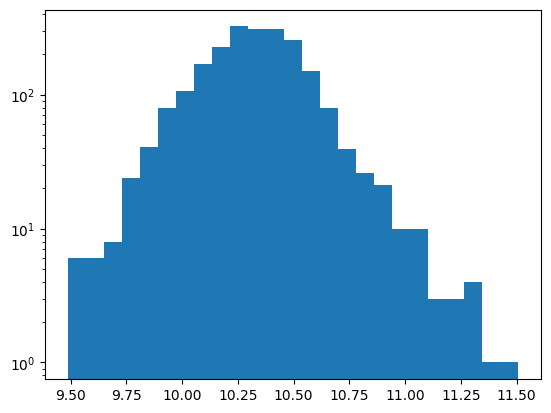

In [12]:
mask = (subhalo_mass < 12.2) & (subhalo_mass > 11.8)
plt.hist(stellar_mass[mask], bins=25)
plt.yscale('log')

In [16]:
mask = (subhalo_mass < 12.2) & (subhalo_mass > 11.5)
_gr = gr[mask]

In [17]:
np.sum(np.isnan(_gr)) / len(_gr)

0.0

In [18]:
_gr.shape

(5561,)

(array([  2.,   4.,   3.,   7.,  21.,  48.,  57., 114., 147., 182., 186.,
        169., 162., 133., 101.,  82.,  75.,  47.,  51.,  65.,  56.,  87.,
        183., 207.,  20.]),
 array([0.16703987, 0.19340195, 0.21976402, 0.2461261 , 0.27248818,
        0.29885024, 0.32521233, 0.35157439, 0.37793648, 0.40429854,
        0.43066064, 0.4570227 , 0.48338479, 0.50974685, 0.53610891,
        0.56247103, 0.58883309, 0.61519516, 0.64155722, 0.66791934,
        0.6942814 , 0.72064346, 0.74700552, 0.77336764, 0.7997297 ,
        0.82609177]),
 <BarContainer object of 25 artists>)

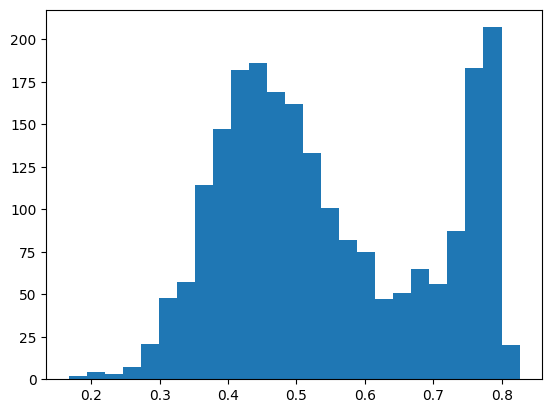

In [54]:
plt.hist(_gr, bins=25)

## Playground

In [19]:
file = f'../../data/tng/100/fof_subhalo_tab_099.99.hdf5'

In [20]:
f = h5py.File(file, 'r')

In [21]:
f.keys()

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>

In [9]:
sorted(f['Subhalo'].keys())

['SubhaloBHMass',
 'SubhaloBHMdot',
 'SubhaloBfldDisk',
 'SubhaloBfldHalo',
 'SubhaloCM',
 'SubhaloFlag',
 'SubhaloGasMetalFractions',
 'SubhaloGasMetalFractionsHalfRad',
 'SubhaloGasMetalFractionsMaxRad',
 'SubhaloGasMetalFractionsSfr',
 'SubhaloGasMetalFractionsSfrWeighted',
 'SubhaloGasMetallicity',
 'SubhaloGasMetallicityHalfRad',
 'SubhaloGasMetallicityMaxRad',
 'SubhaloGasMetallicitySfr',
 'SubhaloGasMetallicitySfrWeighted',
 'SubhaloGrNr',
 'SubhaloHalfmassRad',
 'SubhaloHalfmassRadType',
 'SubhaloIDMostbound',
 'SubhaloLen',
 'SubhaloLenType',
 'SubhaloMass',
 'SubhaloMassInHalfRad',
 'SubhaloMassInHalfRadType',
 'SubhaloMassInMaxRad',
 'SubhaloMassInMaxRadType',
 'SubhaloMassInRad',
 'SubhaloMassInRadType',
 'SubhaloMassType',
 'SubhaloParent',
 'SubhaloPos',
 'SubhaloSFR',
 'SubhaloSFRinHalfRad',
 'SubhaloSFRinMaxRad',
 'SubhaloSFRinRad',
 'SubhaloSpin',
 'SubhaloStarMetalFractions',
 'SubhaloStarMetalFractionsHalfRad',
 'SubhaloStarMetalFractionsMaxRad',
 'SubhaloStarMetalli

In [23]:
f['Subhalo']['SubhaloMass'].shape, f['Subhalo']['SubhaloMassInRadType'].shape # 4th elements corresponds to star particles

((2478,), (2478, 6))

In [106]:
from multicam.tng.utils import convert_tng_mass

gmass = convert_tng_mass(f['Group']['Group_M_TopHat200'][:])